In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\Project-1\Climate_dataset.csv")

In [3]:
df.head()

,Year,Temperature_C,Precipitation_mm,CO2_ppm,Solar_Radiation_W/m2,Sea_Level_mm,Temp_Anomaly_C,Sea_Level_Rise_mm,Extreme_Weather_Events
0,2000,15.01,919.0,368.13,341.00,-2.9,0.85,3.49,92
1,2001,14.95,1019.7,369.70,342.13,-0.2,1.39,3.27,97
2,2002,14.31,980.1,372.18,343.90,4.6,0.67,3.58,65
3,2003,14.88,948.8,375.23,341.62,16.5,0.77,3.47,117
4,2004,14.81,994.1,376.08,341.85,14.0,0.96,3.73,103


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    25 non-null     int64  
 1   Temperature_C           25 non-null     float64
 2   Precipitation_mm        25 non-null     float64
 3   CO2_ppm                 25 non-null     float64
 4   Solar_Radiation_W/m2    25 non-null     float64
 5   Sea_Level_mm            25 non-null     float64
 6   Temp_Anomaly_C          25 non-null     float64
 7   Sea_Level_Rise_mm       25 non-null     float64
 8   Extreme_Weather_Events  25 non-null     int64  
dtypes: float64(7), int64(2)
memory usage: 1.9 KB


In [5]:
df.describe()

,Year,Temperature_C,Precipitation_mm,CO2_ppm,Solar_Radiation_W/m2,Sea_Level_mm,Temp_Anomaly_C,Sea_Level_Rise_mm,Extreme_Weather_Events
count,25.000000,25.000000,25.000000,25.00000,25.00000,25.000000,25.000000,25.000000,25.00000
mean,2012.000000,14.702000,988.216000,394.78320,341.53960,42.536000,0.905200,3.344000,102.00000
std,7.359801,0.253344,54.293168,16.06981,1.33309,26.374244,0.174311,0.414457,23.94612
min,2000.000000,14.220000,870.500000,368.13000,339.06000,-2.900000,0.660000,2.460000,65.00000
25%,2006.000000,14.530000,957.500000,382.31000,340.59000,20.700000,0.780000,3.060000,80.00000
50%,2012.000000,14.680000,980.100000,395.59000,341.67000,44.000000,0.900000,3.380000,103.00000
75%,2018.000000,14.910000,1019.700000,406.37000,342.59000,63.300000,0.960000,3.660000,116.00000
max,2024.000000,15.240000,1103.400000,421.28000,343.90000,81.000000,1.390000,4.040000,158.00000


In [6]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7436\1135047638.py:29: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


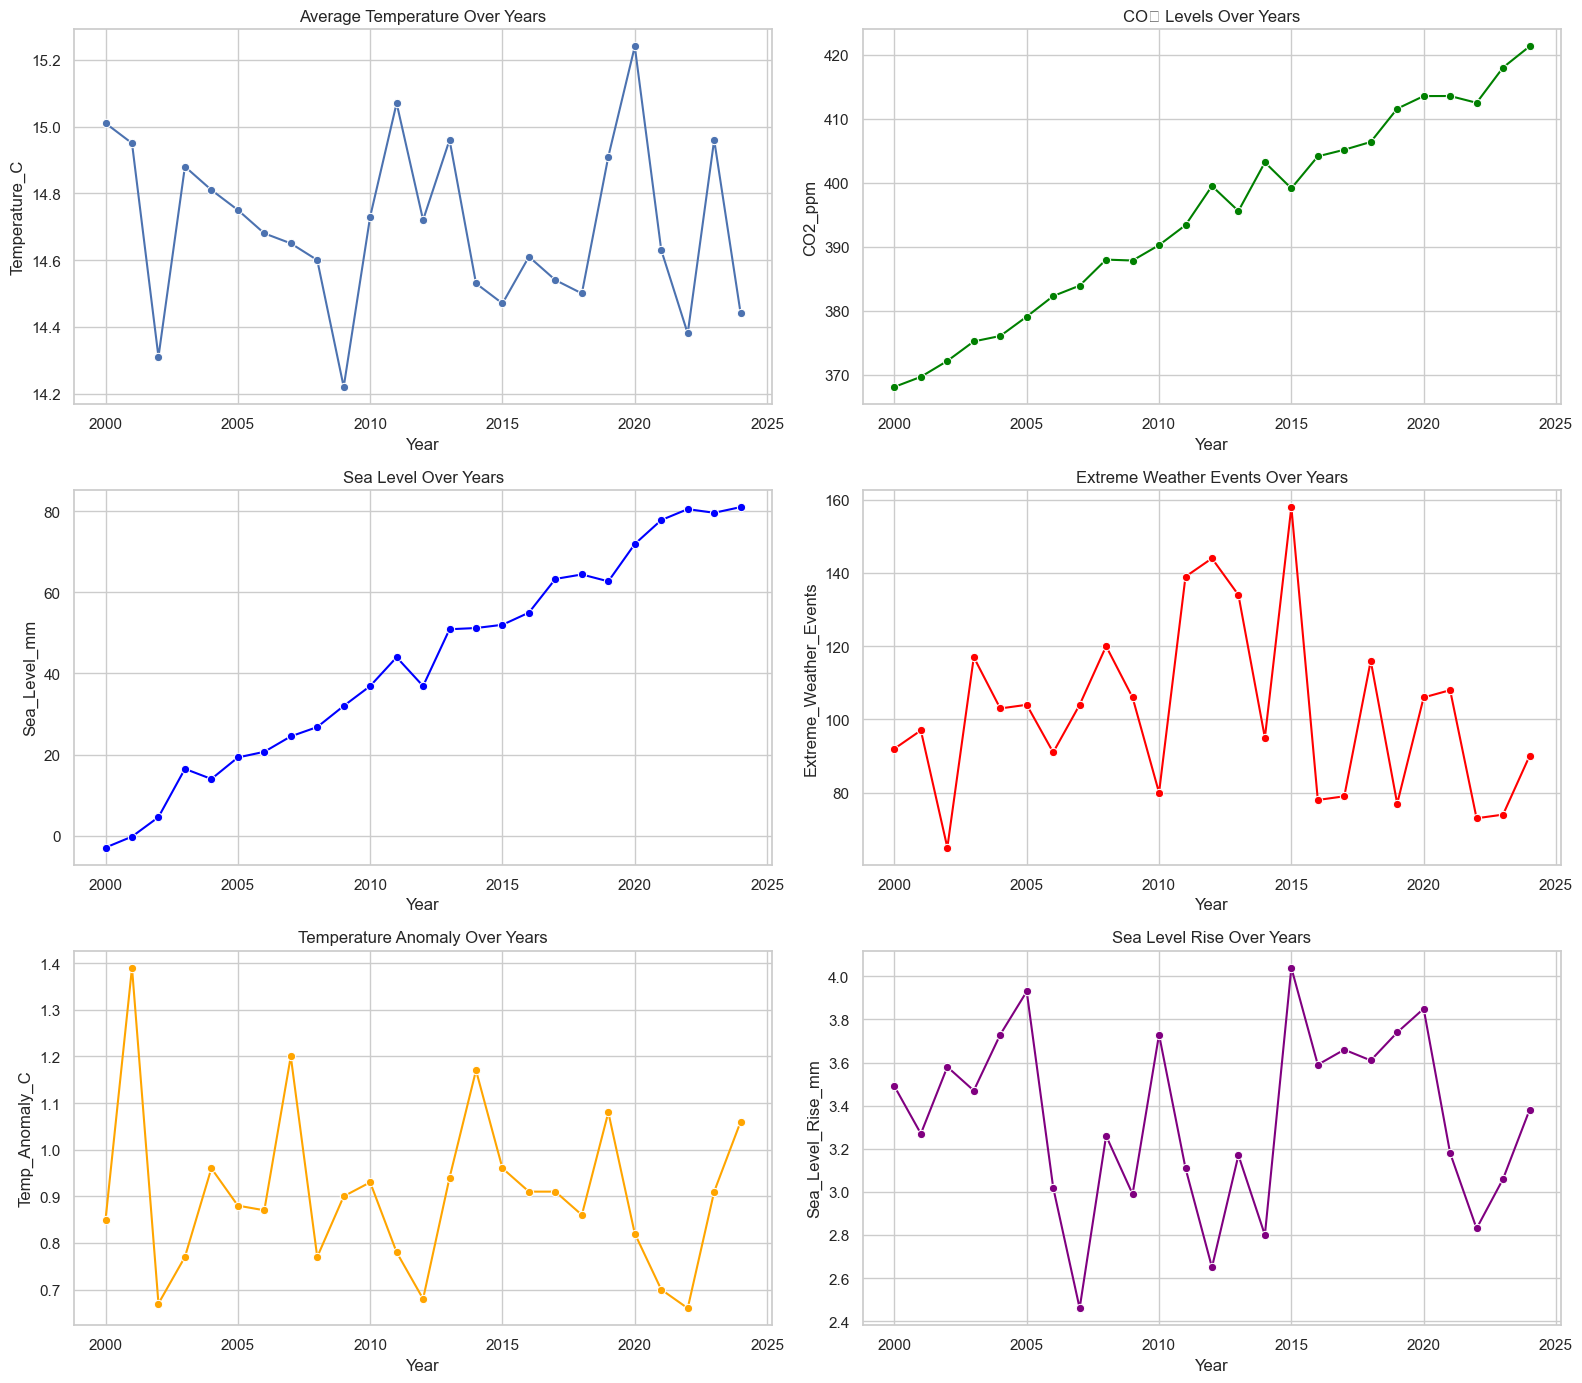

In [7]:
# Create subplots for visual comparison
fig, axs = plt.subplots(3, 2, figsize=(16, 14))
years = df['Year']

# 1. Temperature over years
sns.lineplot(x=years, y=df['Temperature_C'], ax=axs[0, 0], marker='o')
axs[0, 0].set_title('Average Temperature Over Years')

# 2. CO2 levels over years
sns.lineplot(x=years, y=df['CO2_ppm'], ax=axs[0, 1], marker='o', color='green')
axs[0, 1].set_title('CO₂ Levels Over Years')

# 3. Sea level over years
sns.lineplot(x=years, y=df['Sea_Level_mm'], ax=axs[1, 0], marker='o', color='blue')
axs[1, 0].set_title('Sea Level Over Years')

# 4. Extreme weather events
sns.lineplot(x=years, y=df['Extreme_Weather_Events'], ax=axs[1, 1], marker='o', color='red')
axs[1, 1].set_title('Extreme Weather Events Over Years')

# 5. Temperature anomaly
sns.lineplot(x=years, y=df['Temp_Anomaly_C'], ax=axs[2, 0], marker='o', color='orange')
axs[2, 0].set_title('Temperature Anomaly Over Years')

# 6. Sea level rise
sns.lineplot(x=years, y=df['Sea_Level_Rise_mm'], ax=axs[2, 1], marker='o', color='purple')
axs[2, 1].set_title('Sea Level Rise Over Years')

plt.tight_layout()
plt.show()


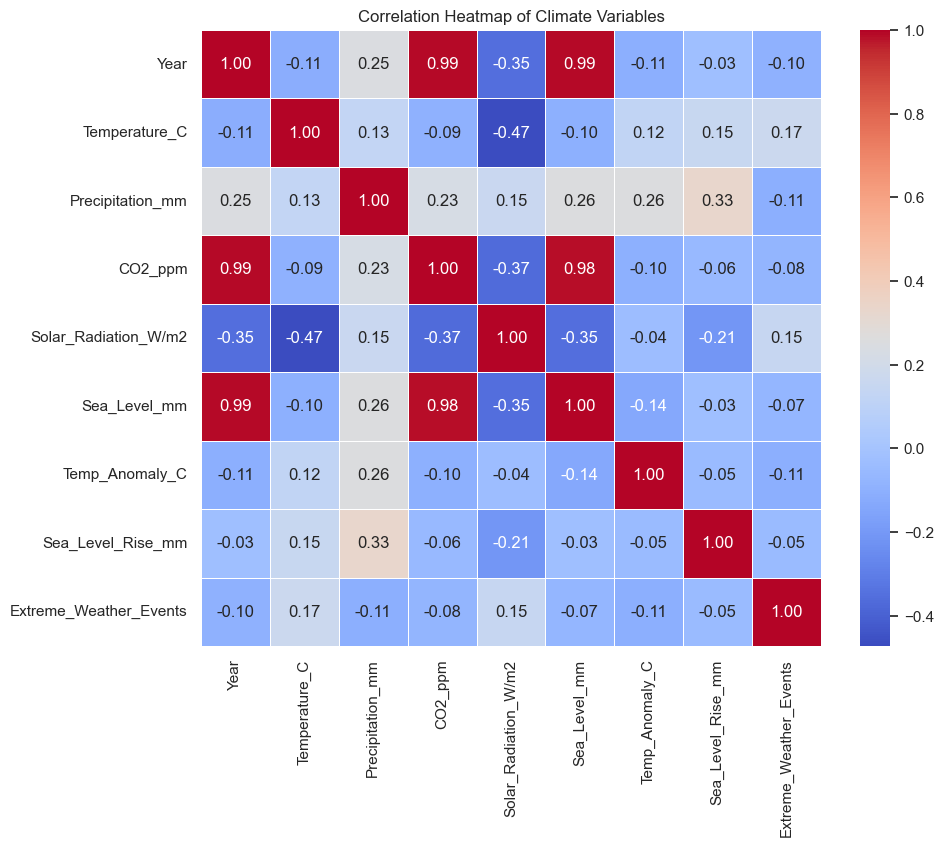

In [8]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Climate Variables")
plt.show()


In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
Series([], dtype: int64)


In [10]:
# Example: Fill missing numeric values with the column mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Or, drop rows with missing values
# df.dropna(inplace=True)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Select features and target variable (example: predicting Temperature_C)
features = df.drop(columns=['Temperature_C'])  # All except the target
target = df['Temperature_C']

# 2. Normalize numeric features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 3. Split into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(
    features_scaled, target, test_size=0.3, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)


Training set: (17, 8)
Validation set: (4, 8)
Test set: (4, 8)


In [12]:
# Make a copy to avoid modifying the original dataframe
df_fe = df.copy()

# Sort by Year just in case
df_fe = df_fe.sort_values('Year')

# Create lagged features
df_fe['CO2_ppm_lag1'] = df_fe['CO2_ppm'].shift(1)
df_fe['Temperature_C_lag1'] = df_fe['Temperature_C'].shift(1)

# Create rolling average features (3-year window)
df_fe['Temp_3yr_avg'] = df_fe['Temperature_C'].rolling(window=3).mean()
df_fe['CO2_3yr_avg'] = df_fe['CO2_ppm'].rolling(window=3).mean()

# Drop NA rows created due to lag/rolling
df_fe.dropna(inplace=True)

df_fe.head()


,Year,Temperature_C,Precipitation_mm,CO2_ppm,Solar_Radiation_W/m2,Sea_Level_mm,Temp_Anomaly_C,Sea_Level_Rise_mm,Extreme_Weather_Events,CO2_ppm_lag1,Temperature_C_lag1,Temp_3yr_avg,CO2_3yr_avg
2,2002,14.31,980.1,372.18,343.90,4.6,0.67,3.58,65,369.70,14.95,14.756667,370.003333
3,2003,14.88,948.8,375.23,341.62,16.5,0.77,3.47,117,372.18,14.31,14.713333,372.370000
4,2004,14.81,994.1,376.08,341.85,14.0,0.96,3.73,103,375.23,14.88,14.666667,374.496667
5,2005,14.75,965.4,379.10,341.22,19.3,0.88,3.93,104,376.08,14.81,14.813333,376.803333
6,2006,14.68,1103.4,382.31,342.76,20.7,0.87,3.02,91,379.10,14.75,14.746667,379.163333


In [13]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import numpy as np

In [15]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)

    # Evaluation metrics
    mae = mean_absolute_error(y_val, predictions)
    mse = mean_squared_error(y_val, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, predictions)

    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# Show results
results_df = pd.DataFrame(results).T
print(results_df)


                        MAE       MSE      RMSE         R2
Linear Regression  0.275342  0.093118  0.305152 -44.423385
Random Forest      0.333025  0.118714  0.344550 -56.909504
XGBoost            0.389250  0.155355  0.394151 -74.783108


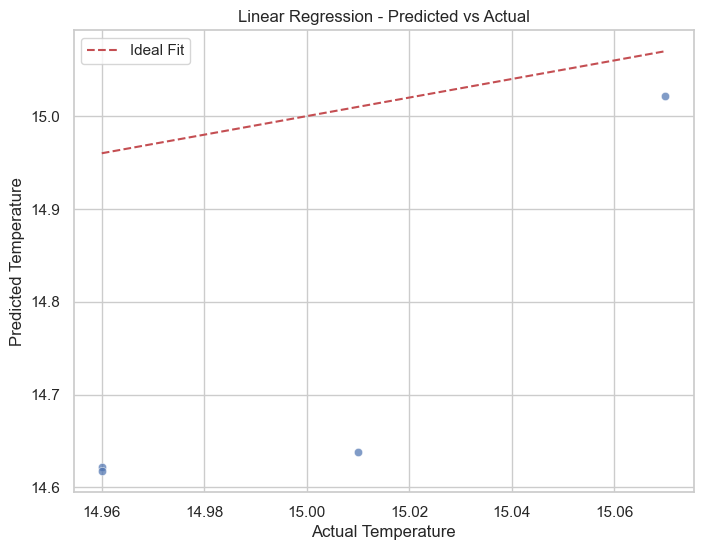

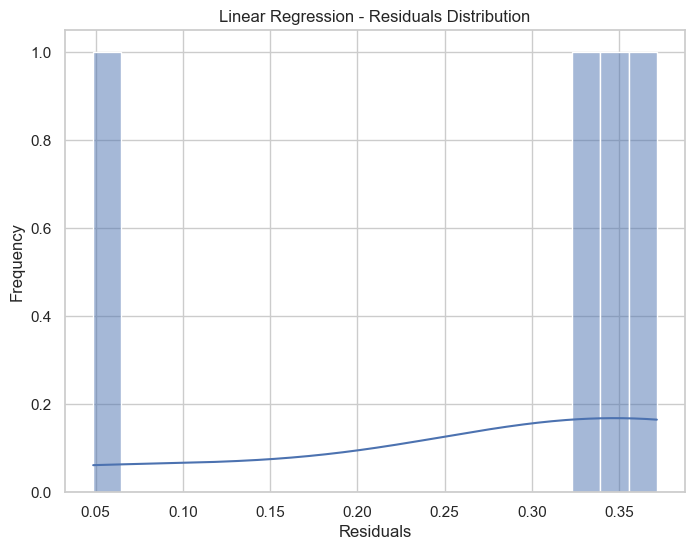

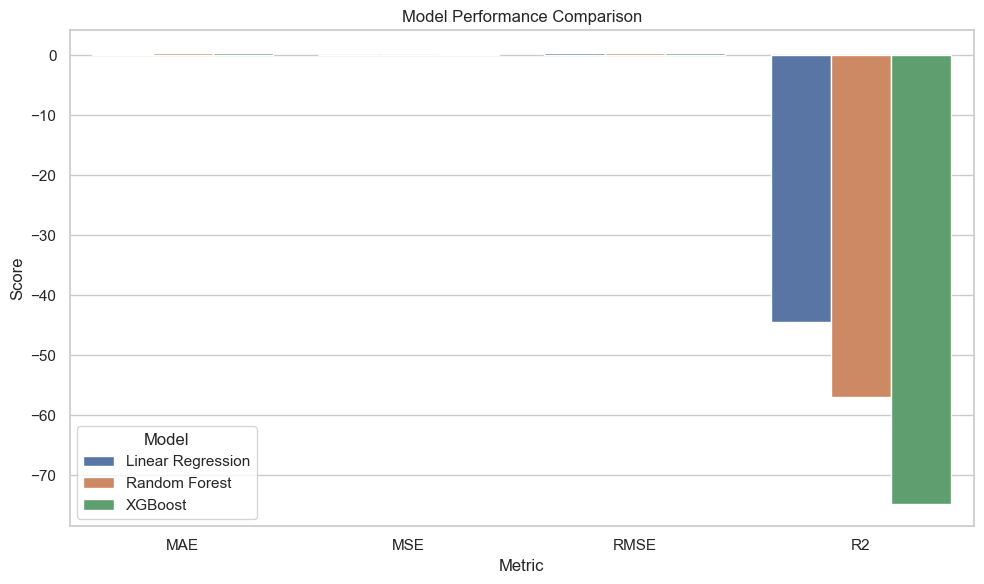

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a model to visualize (e.g., XGBoost)
best_model_name = results_df['R2'].idxmax()
best_model = models[best_model_name]
best_predictions = best_model.predict(X_val)

# 1. Predicted vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=best_predictions, alpha=0.7)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], '--r', label='Ideal Fit')
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title(f"{best_model_name} - Predicted vs Actual")
plt.legend()
plt.grid(True)
plt.show()

# 2. Residual Plot
residuals = y_val - best_predictions
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True)
plt.title(f"{best_model_name} - Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 3. Performance Comparison Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.reset_index().melt(id_vars="index", var_name="Metric", value_name="Score"),
            x="Metric", y="Score", hue="index")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.legend(title="Model")
plt.tight_layout()
plt.show()


In [17]:
feature_cols = [c for c in df.columns if c not in ('Year','Temperature_C')]
scaler.fit(df[feature_cols])


StandardScaler()

                          R2      RMSE
Linear Regression -32.985238  0.263950
Random Forest     -58.112579  0.348110
XGBoost           -76.362004  0.398236
Best model: Linear Regression


C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


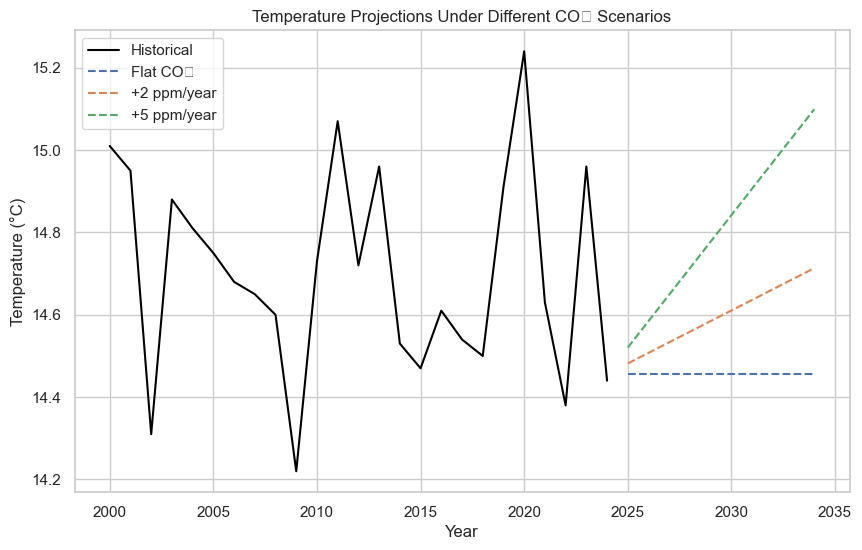

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler
from sklearn.linear_model   import LinearRegression
from sklearn.ensemble       import RandomForestRegressor
import xgboost               as xgb
from sklearn.metrics        import mean_squared_error, r2_score

# 1) Define feature columns (drop Year entirely)
feature_cols = [c for c in df.columns if c not in ('Year','Temperature_C')]

# 2) Split X/y
X = df[feature_cols]
y = df['Temperature_C']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# 3) Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)

# 4) Train your models again
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest'    : RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost'          : xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
}

results = {}
for name, mdl in models.items():
    mdl.fit(X_train_scaled, y_train)
    pred_val = mdl.predict(X_val_scaled)
    mse = mean_squared_error(y_val, pred_val)
    results[name] = {'R2': r2_score(y_val, pred_val), 'RMSE': np.sqrt(mse)}

results_df = pd.DataFrame(results).T
print(results_df)

# Pick the best
best_name  = results_df['R2'].idxmax()
best_model = models[best_name]
print("Best model:", best_name)


# 5) Scenario Analysis (no Year)
horizon = 10
years   = np.arange(df['Year'].max()+1, df['Year'].max()+1+horizon)

# last known physical drivers
last = df[feature_cols].iloc[-1]

# define CO₂ scenarios
scenarios = {
    'Flat CO₂'    : np.zeros(horizon),
    '+2 ppm/year' : np.full(horizon, 2),
    '+5 ppm/year' : np.full(horizon, 5),
}

projections = {}
for name, delta in scenarios.items():
    co2_vals = last['CO2_ppm'] + np.cumsum(delta)
    df_s     = pd.DataFrame({col: last[col] for col in feature_cols}, index=years)
    df_s['CO2_ppm'] = co2_vals
    X_s            = scaler.transform(df_s)           # now exactly 7 features
    projections[name] = best_model.predict(X_s)

# 6) Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.lineplot(x=df['Year'], y=df['Temperature_C'], label='Historical', color='black')
for name, pred in projections.items():
    sns.lineplot(x=years, y=pred, label=name, linestyle='--')

plt.title("Temperature Projections Under Different CO₂ Scenarios")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
import joblib

joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [20]:
import streamlit as st
import numpy as np
import pandas as pd
import joblib

# Load model and scaler
model = joblib.load('best_model.pkl')
scaler = joblib.load('scaler.pkl')

st.title("🌍 Climate Temperature Prediction App")

st.markdown("""
This app predicts the **average temperature** based on climate-related variables.
""")

# Define the features you used
feature_cols = ['CO2_ppm', 'Sea_Level_mm', 'Extreme_Weather_Events', 'Temp_Anomaly_C', 'Sea_Level_Rise_mm']

# Create inputs
inputs = {}
for col in feature_cols:
    inputs[col] = st.number_input(f"Enter value for {col}", step=0.1)

# Predict
if st.button("Predict Temperature"):
    input_df = pd.DataFrame([inputs])
    scaled_input = scaler.transform(input_df)
    prediction = model.predict(scaled_input)[0]
    st.success(f"🌡️ Predicted Temperature: {prediction:.2f}°C")


2025-04-25 10:09:32.645 
  command:

    streamlit run C:\Users\Admin\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-25 10:09:32.645 Session state does not function when running a script without `streamlit run`


In [21]:
import os
print(os.listdir())


['.ipynb_checkpoints', 'app.py', 'best_model.pkl', 'Climate Change Modeling.pdf', 'Climate_dataset.csv', 'climate_nasa.csv', 'GLB.Ts+dSST.csv', 'Project-1.ipynb', 'requirements.txt', 'scaler.pkl', 'Untitled.ipynb']


In [22]:
import os
print("Current Working Directory:", os.getcwd())
print("Files in this directory:", os.listdir())


Current Working Directory: C:\Users\Admin\Desktop\Project-1
Files in this directory: ['.ipynb_checkpoints', 'app.py', 'best_model.pkl', 'Climate Change Modeling.pdf', 'Climate_dataset.csv', 'climate_nasa.csv', 'GLB.Ts+dSST.csv', 'Project-1.ipynb', 'requirements.txt', 'scaler.pkl', 'Untitled.ipynb']
